# Import packages

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Load Dataset

In [84]:
data = pd.read_csv('train.csv')

In [85]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90


In [86]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
5995,FDB32,20.600,Low Fat,0.023586,Fruits and Vegetables,94.7778,OUT017,2007,NaN,Tier 2,Supermarket Type1,7.18
5996,FDJ16,9.195,Low Fat,0.115064,Frozen Foods,58.6246,OUT049,1999,Medium,Tier 1,Supermarket Type1,6.77
5997,FDJ32,10.695,Low Fat,0.057910,Fruits and Vegetables,60.4536,OUT045,2002,NaN,Tier 2,Supermarket Type1,5.21
5998,FDO12,15.750,Low Fat,0.054920,Baking Goods,195.8452,OUT035,2004,Small,Tier 2,Supermarket Type1,8.50
5999,NCB18,19.600,Low Fat,0.041291,Household,86.9514,OUT046,1997,Small,Tier 1,Supermarket Type1,7.26


In [87]:
data.shape

(6000, 12)

# Data Exploration & Cleaning

Count the nulls and identify the type of each feature

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6000 non-null   object 
 1   X2      4994 non-null   float64
 2   X3      6000 non-null   object 
 3   X4      6000 non-null   float64
 4   X5      6000 non-null   object 
 5   X6      6000 non-null   float64
 6   X7      6000 non-null   object 
 7   X8      6000 non-null   int64  
 8   X9      4289 non-null   object 
 9   X10     6000 non-null   object 
 10  X11     6000 non-null   object 
 11  Y       6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


Descriptive Statistics

In [89]:
data.describe()

,X2,X4,X6,X8,Y
count,4994.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,12.956536,0.066333,141.228200,1997.840333,7.303403
std,4.658851,0.051492,62.540569,8.334412,1.014361
min,4.555000,0.000000,31.290000,1985.000000,3.510000
25%,8.895000,0.027030,94.037650,1987.000000,6.750000
50%,12.800000,0.054620,143.197000,1999.000000,7.500000
75%,17.100000,0.095154,186.522050,2004.000000,8.040000
max,21.350000,0.328391,266.888400,2009.000000,9.400000


Explore the categorical features

In [90]:
# Count the unique values in each categorical feature
print(data['X1'].unique().size)
print(f"X3 = {data['X3'].unique()}, number = {data['X3'].unique().size}")
print(f"X5 = {data['X5'].unique()}, number = {data['X5'].unique().size}")
print(f"X7 = {data['X7'].unique()}, number = {data['X7'].unique().size}")
print(f"X10 = {data['X10'].unique()}, number = {data['X10'].unique().size}")
print(f"X11 = {data['X11'].unique()}, number = {data['X11'].unique().size}")

1553
X3 = ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'], number = 5
X5 = ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'], number = 16
X7 = ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'], number = 10
X10 = ['Tier 1' 'Tier 3' 'Tier 2'], number = 3
X11 = ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'], number = 4


# Data Preprocessing Pipeline
* **Nulls Imputer**: Replace missing values with the mean of the respective feature.
* **Ordinal Feature Encoder**: Convert categorical variables into numerical variables while keeping the order of categories.
* **Label Feature Encoder**: Convert categorical labels into numerical labels.
* **Feature Dropper**: Drops unnecessary features from the dataset.

In [91]:
class NullsImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_filled = X.fillna(X.mean())
        return X_filled

In [92]:
class OrdinalFeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        ordinal_encoder = OrdinalEncoder(
            categories=[['Tier 1', 'Tier 2', 'Tier 3'],
                        ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']])
        X[['X10_encoded', 'X11_encoded']] = ordinal_encoder.fit_transform(X[['X10', 'X11']]) + 1
        return X

In [93]:
class LabelFeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['X3'] = X['X3'].str.lower().replace({'lf': 'low fat', 'reg': 'regular'})
        X3_label_encoder = LabelEncoder()
        X['X3_encoded'] = X3_label_encoder.fit_transform(X['X3']) 
        X5_label_encoder = LabelEncoder()
        X['X5_encoded'] = X5_label_encoder.fit_transform(X['X5'])
        return X

In [94]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['X1', 'X7', 'X10', 'X11', 'X3', 'X5', 'X9'], axis=1, errors="ignore")

In [95]:

pipeline = Pipeline([("OrdinalFeatureEncoder", OrdinalFeatureEncoder()),
                     ("LabelFeatureEncoder", LabelFeatureEncoder()),
                     ("FeatureDropper", FeatureDropper()),
                     ("NullsImputer", NullsImputer())])

data = pipeline.fit_transform(data)
data.head()

,X2,X4,X6,X8,Y,X10_encoded,X11_encoded,X3_encoded,X5_encoded
0,9.30,0.016047,249.8092,1999,8.23,1.0,2.0,0,4
1,5.92,0.019278,48.2692,2009,6.09,3.0,3.0,1,14
2,17.50,0.016760,141.6180,1999,7.65,1.0,2.0,0,10
3,19.20,0.000000,182.0950,1998,6.60,3.0,1.0,1,6
4,8.93,0.000000,53.8614,1987,6.90,3.0,2.0,0,9


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X2           6000 non-null   float64
 1   X4           6000 non-null   float64
 2   X6           6000 non-null   float64
 3   X8           6000 non-null   int64  
 4   Y            6000 non-null   float64
 5   X10_encoded  6000 non-null   float64
 6   X11_encoded  6000 non-null   float64
 7   X3_encoded   6000 non-null   int32  
 8   X5_encoded   6000 non-null   int32  
dtypes: float64(6), int32(2), int64(1)
memory usage: 375.1 KB


Plot the correlations after encoding all the features

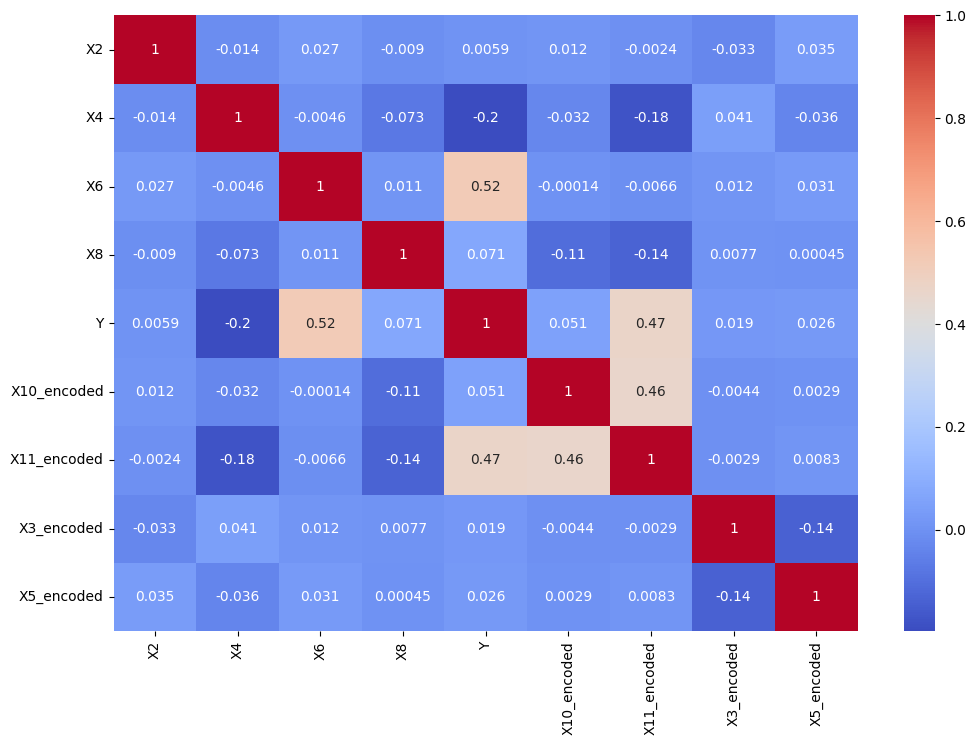

In [97]:
plt.figure(figsize=(12, 8))  # Increase size (width=12, height=8)
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Data Splitting

In [98]:
X = data.drop(['Y'], axis=1)
y = data['Y']

# Model Training with RandomForestRegressor

In [99]:
reg = RandomForestRegressor()

param_grid = [
    {"n_estimators": [10, 100, 200, 500],
     "max_depth": [None, 5, 10],
     "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X, y)
best_reg = grid_search.best_estimator_
best_reg

RandomForestRegressor(max_depth=5, min_samples_split=4)

# Final Predictions

In [100]:
test_data = pd.read_csv('test.csv')
test_data = pipeline.transform(test_data)
test_data.head()

,X2,X4,X6,X8,X10_encoded,X11_encoded,X3_encoded,X5_encoded
0,12.618604,0.021273,229.1326,1985,3.0,4.0,0,2
1,17.350000,0.027588,86.1856,1987,3.0,2.0,1,3
2,9.300000,0.111782,182.3292,1998,3.0,1.0,0,5
3,6.710000,0.029606,65.4142,1999,1.0,2.0,1,0
4,17.100000,0.129141,109.4886,2007,2.0,2.0,0,6


In [101]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X2           2523 non-null   float64
 1   X4           2523 non-null   float64
 2   X6           2523 non-null   float64
 3   X8           2523 non-null   int64  
 4   X10_encoded  2523 non-null   float64
 5   X11_encoded  2523 non-null   float64
 6   X3_encoded   2523 non-null   int32  
 7   X5_encoded   2523 non-null   int32  
dtypes: float64(5), int32(2), int64(1)
memory usage: 138.1 KB


In [102]:
predictions = best_reg.predict(test_data)
predictions

array([8.65950203, 7.07236144, 6.13835127, ..., 7.07477176, 7.29078898,
       7.01200504])

In [103]:
final_predictions = pd.DataFrame()
final_predictions['row_id'] = [i for i in range(test_data.shape[0])]
final_predictions['Y'] = predictions
final_predictions.to_csv("Predictions.csv", index=False)